# 1. Data Preparation

In [1]:
# Imported neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bobabayarea/bayarea_boba_spots.csv


In [2]:
# Load dataset and clean it

df = pd.read_csv('/kaggle/input/bobabayarea/bayarea_boba_spots.csv')

df_cleaned = df.drop(columns=['Unnamed: 0'])

# Display the first few rows of the dataset
df_cleaned.head()

,id,name,rating,address,city,lat,long
0,99-tea-house-fremont-2,99% Tea House,4.5,3623 Thornton Ave,Fremont,37.562950,-122.010040
1,one-tea-fremont-2,One Tea,4.5,46809 Warm Springs Blvd,Fremont,37.489067,-121.929414
2,royaltea-usa-fremont,Royaltea USA,4.0,38509 Fremont Blvd,Fremont,37.551315,-121.993850
3,teco-tea-and-coffee-bar-fremont,TECO Tea & Coffee Bar,4.5,39030 Paseo Padre Pkwy,Fremont,37.553694,-121.981043
4,t-lab-fremont-3,T-LAB,4.0,34133 Fremont Blvd,Fremont,37.576149,-122.043705


# 2. Data Visualization

## 2.1 Top 10 Cities with the Most Boba Shops

In [3]:
sorted_by_rating_df = df_cleaned.sort_values(by='rating', ascending=False)

sorted_by_rating_df

,id,name,rating,address,city,lat,long
533,honey-bear-smoothie-tea-and-dessert-hayward,Honey Bear Smoothie Tea & Dessert,5.0,1 Southland Mall Dr,Hayward,37.654233,-122.104842
365,taza-deli-and-cafe-redwood-city,Taza Deli & Cafe,5.0,1796 Broadway,Redwood City,37.486866,-122.223413
89,puppy-bobar-san-francisco,Puppy Bobar,5.0,1142 Grant Ave,San Francisco,37.797540,-122.406790
505,golden-bakery-pittsburg,Golden Bakery,5.0,2229 Railroad Ave,Pittsburg,38.013650,-121.890487
397,i-tea-burlingame-2,i-Tea,5.0,346 Lorton Ave,Burlingame,37.580121,-122.346889
...,...,...,...,...,...,...,...
575,quickly-san-leandro,Quickly,2.5,15251 Hesperian Blvd,San Leandro,37.697834,-122.130356
587,china-kitchen-express-san-leandro,China Kitchen Express,2.0,13780 E 14th St,San Leandro,37.715401,-122.142326
578,loving-tea-san-leandro,Loving Tea,2.0,1338 Fairmont Dr,San Leandro,37.702617,-122.127239
371,panda-express-mountain-view-2,Panda Express,2.0,1035 El Monte Ave,Mountain View,37.390984,-122.095294


## 2.2 Geographical Distribution of Boba Shops

In this section, we create a heatmap to visualize the density of boba shops in the Bay Area. A heatmap is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. This can be particularly useful for identifying areas with a high concentration of boba shops.

The steps involved are as follows:

Extract the latitude and longitude coordinates from the cleaned dataset to form a list of locations.
Define the coordinates for the center of the map, which in this case is set to the coordinates of San Francisco.
Create a base map centered around San Francisco with an appropriate zoom level to cover the Bay Area.
Add a heatmap layer to the map using the list of locations.
Display the heatmap to visually represent the density of boba shops across the Bay Area.

In [5]:
locations = df_cleaned[['lat', 'long']].values.tolist()

bay_area_coords = [37.7749, -122.4194]  # Coordinates for San Francisco
map_boba = folium.Map(location=bay_area_coords, zoom_start=10)

HeatMap(locations).add_to(map_boba)

map_boba

The heatmap reveals several areas with high concentrations of boba shops particularly around high population areas such as San Francisco, Dublin, and the Hayward/Castro Valley region. These hotspots indicate popular locations for boba shops, likely due to high foot traffic and a significant customer base. Additionally, other notable clusters are visible in Berkeley and Oakland, suggesting these cities also have thriving boba shop scenes.

# 3. K-Means Clustering Analysis

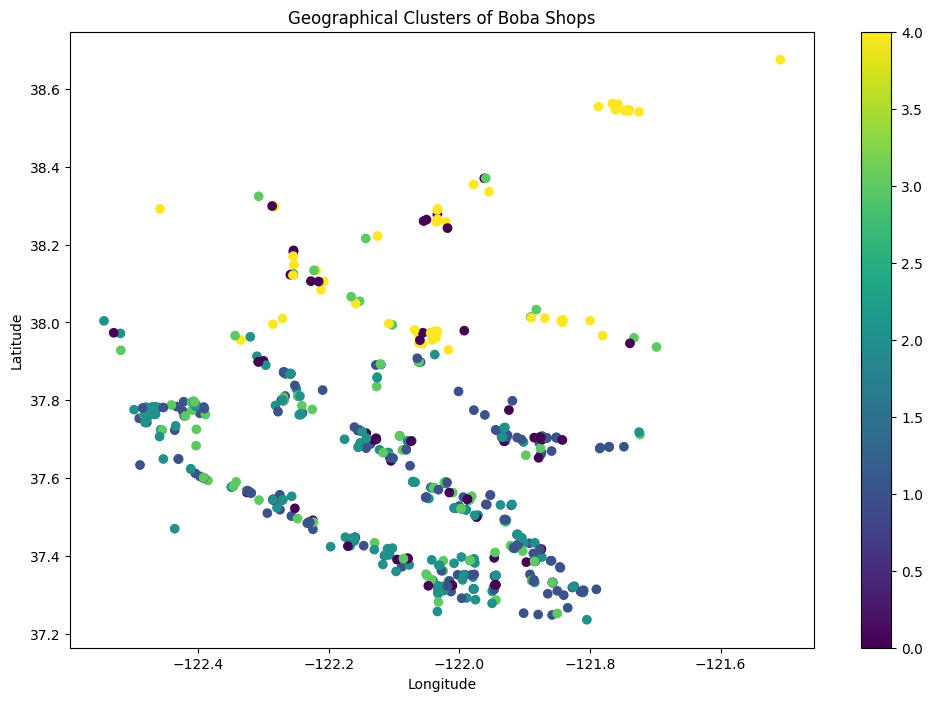

In [7]:
# Prepare the data for clustering
X = df_cleaned[['lat', 'long', 'rating']]

# Perform K-Means clustering with explicit n_init parameter
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0).fit(X)
df_cleaned['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned['long'], df_cleaned['lat'], c=df_cleaned['cluster'], cmap='viridis')
plt.colorbar()
plt.title('Geographical Clusters of Boba Shops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Analysis: Higher-rated boba shops tend to cluster around certain areas like the central and northern parts of the map, particularly near major urban centers such as San Francisco and Berkeley. Conversely, clusters with lower-rated shops are more dispersed in the outer regions, such as in the eastern and southern areas. This suggests that urban areas might offer better conditions for higher-rated boba shops, possibly due to factors like higher foot traffic, more discerning customer bases, or better access to quality ingredients. Further investigation could involve comparing these clusters with demographic data or examining the impact of competition density on shop ratings.

# 4. Machine Learning Models


## Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df_cleaned[['lat', 'long']]
y = df_cleaned['rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.24900882353168982


Analysis: The Mean Squared Error (MSE) of 0.249 indicates the model's accuracy in predicting the ratings based on the latitude and longitude of the boba shops. This suggests a moderate level of error.

## 4.2 Ridge Regression with Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model and the parameters to search
model = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # neg_mean_squared_error is negative, so we negate it

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_score}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

Best Parameters: {'alpha': 1}
Best MSE: 0.26011914285192855
Test MSE: 0.249160021834193


Analysis: The Ridge regression model with an alpha of 1 achieved the best performance, with a Test MSE of 0.249, similar to the Linear Regression model. This suggests that Ridge regression, with the selected parameters, provides a similar level of predictive accuracy for the ratings.

# 5. Summary

In this analysis, we explored the distribution and clustering of boba shops in the area. We applied machine learning models to predict shop ratings based on their geographical coordinates. The K-Means clustering revealed distinct clusters of boba shops, and both Linear Regression and Ridge Regression models provided similar accuracy in predicting ratings. These insights could help identify potential areas for opening new boba shops or understanding the factors that contribute to higher ratings.